In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
from keras.losses import categorical_crossentropy
from keras.layers.pooling import MaxPool2D

In [ ]:

model = Sequential()
model.add(Conv2D(48,(11,11),activation='relu',input_shape=(224,224,3),padding='valid',stride=4))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 64)        6976      
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 128)               3612800   
                                                                 
 dense_1 (Dense)             (None, 10)                1

# Another way of building the sequential model

In [ ]:
i = tf.keras.Input((32,32,6))
x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu',padding='valid')(i)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same')(x)
x = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding = 'valid')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same')(x)
x = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding = 'valid')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(1,activation='linear')(x)
model = tf.keras.Model(inputs=i, outputs=x)

In [ ]:
!pip install visualkeras

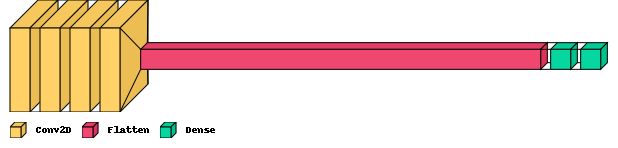

In [ ]:
import visualkeras
from PIL import ImageFont

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True)